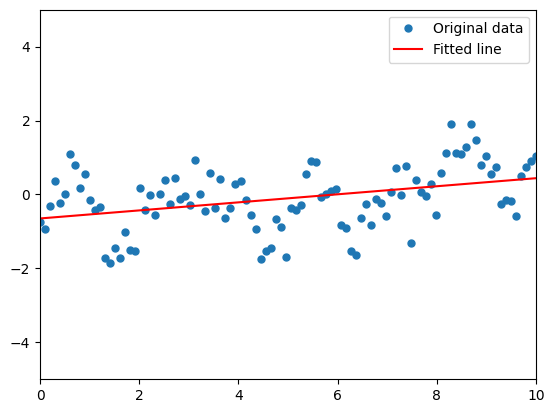

In [17]:
# Data4Regression.xlsx 读取数据，进行拟合
# Data4Regression.xlsx 有两列数据，第一列是x，第二列是y

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel('Data4Regression.xlsx')
x = data['x'].values
y = data['y_complex'].values

# 拟合方法一：最小二乘法
A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.plot(x, y, '.', label='Original data', markersize=10)
plt.plot(x, a1 * x + b1, 'r', label='Fitted line')
plt.legend()
plt.show()

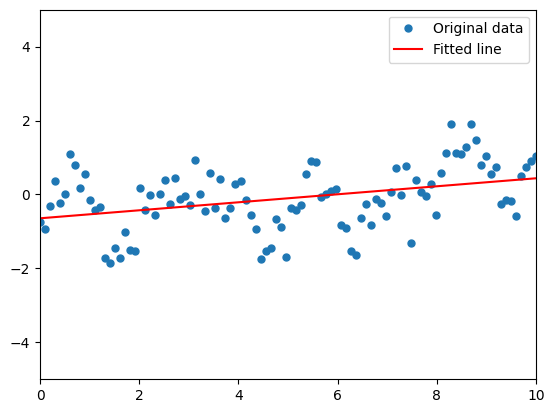

In [2]:
# 拟合方法二：梯度下降法
def gradient_descent(x, y, a, b, lr, epochs):
    for _ in range(epochs):
        a_grad = 2 * np.mean((a * x + b - y) * x)
        b_grad = 2 * np.mean(a * x + b - y)
        a -= lr * a_grad
        b -= lr * b_grad
    return a, b

a2, b2 = gradient_descent(x, y, 0, 0, 0.01, 1000)
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.plot(x, y, '.', label='Original data', markersize=10)
plt.plot(x, a2 * x + b2, 'r', label='Fitted line')
plt.legend()
plt.show()

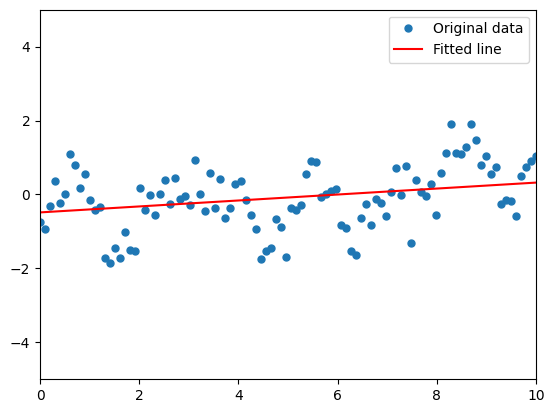

In [3]:
# 拟合方法三：牛顿法
def newton(x, y, a, b, lr, epochs):
    for _ in range(epochs):
        a_grad = 2 * np.mean((a * x + b - y) * x)
        b_grad = 2 * np.mean(a * x + b - y)
        a_hess = 2 * np.mean(x ** 2)
        b_hess = 2
        a -= lr * a_grad / a_hess
        b -= lr * b_grad / b_hess
    return a, b

a3, b3 = newton(x, y, 0, 0, 0.01, 1000)
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.plot(x, y, '.', label='Original data', markersize=10)
plt.plot(x, a3 * x + b3, 'r', label='Fitted line')
plt.legend()
plt.show()

In [134]:
# 拟合方法四：使用MLP
import torch
from torch import nn

net = nn.Sequential(nn.Linear(1,256),nn.ReLU(),
                    nn.Linear(256,256),nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(256,256),nn.ReLU(),
                    nn.Dropout(0.3),
                    nn.Linear(256,256),nn.ReLU(),
                    nn.Dropout(0.4),
                    nn.Linear(256,256),nn.ReLU(),
                    nn.Dropout(0.5),
                    nn.Linear(256,128),nn.ReLU(),
                    nn.Dropout(0.6),
                    nn.Linear(128,32),nn.ReLU(),
                    nn.Linear(32,1))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight)

net.apply(init_weights)
batch_size, lr, num_epochs = (64, 0.0001, 5000)
loss = nn.MSELoss()
trainer = torch.optim.Adam(net.parameters(), lr=lr,weight_decay=0.001)
dataset = torch.utils.data.TensorDataset(torch.tensor(x).unsqueeze(1).float(), torch.tensor(y).unsqueeze(1).float())
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

for _ in range(num_epochs):
    for X, y1 in train_iter:
        l = loss(net(X), y1)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    
    l = loss(net(torch.tensor(x).unsqueeze(1).float()), torch.tensor(y).unsqueeze(1).float())
    print(f'epoch {_ + 1}, loss {l}')


epoch 1, loss 2.1055142879486084
epoch 2, loss 1.6442261934280396
epoch 3, loss 1.259109377861023
epoch 4, loss 1.1026175022125244
epoch 5, loss 1.0418154001235962
epoch 6, loss 1.1428344249725342
epoch 7, loss 0.9416033029556274
epoch 8, loss 1.0069047212600708
epoch 9, loss 1.0374202728271484
epoch 10, loss 0.9078184366226196
epoch 11, loss 0.8440707325935364
epoch 12, loss 0.7076563239097595
epoch 13, loss 0.9086508750915527
epoch 14, loss 0.7737939357757568
epoch 15, loss 0.8218604326248169
epoch 16, loss 0.8121914863586426
epoch 17, loss 0.8377590179443359
epoch 18, loss 0.7767471075057983
epoch 19, loss 0.7937347292900085
epoch 20, loss 0.7437232732772827
epoch 21, loss 0.8005044460296631
epoch 22, loss 0.9252882599830627
epoch 23, loss 0.7292332649230957
epoch 24, loss 0.8229620456695557
epoch 25, loss 0.763446033000946
epoch 26, loss 0.7418085336685181
epoch 27, loss 0.837217390537262
epoch 28, loss 0.7661152482032776
epoch 29, loss 0.7463797926902771
epoch 30, loss 0.862637400

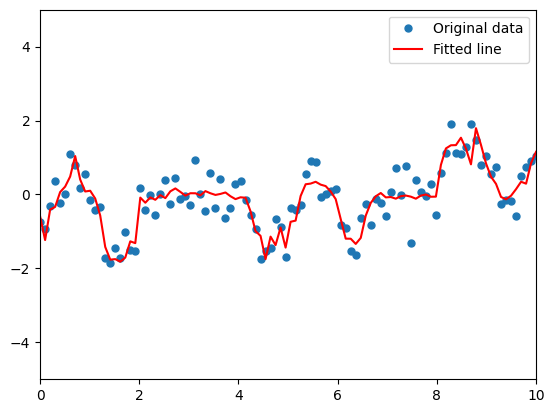

In [137]:
y_hat = net(torch.tensor(x).unsqueeze(1).float()).detach().numpy()
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.plot(x, y, '.', label='Original data', markersize=10)
plt.plot(x, y_hat, 'r', label='Fitted line')
plt.legend()
plt.show()

In [139]:
# 打印结果
print(a1,b1)
print(a2,b2)
print(a3,b3)

# 计算误差
y1 = a1 * x + b1
y2 = a2 * x + b2
y3 = a3 * x + b3
y4 = y_hat.flatten()
print(np.mean((y1 - y) ** 2))
print(np.mean((y2 - y) ** 2))
print(np.mean((y3 - y) ** 2))
print(np.mean((y4 - y) ** 2))

0.10894738685803713 -0.6487466967301856
0.10827265618339714 -0.6442592675352024
0.08065210903038995 -0.48497182098140834
0.6134024281450051
0.6134075391306283
0.6207062918529508
0.16728125004629568
